# Data preprocessing concept work

Development notebook for data processing concepts:
1. Potential cleaning
1. Peak detection
1. Data splitting
1. Visual check of every beat
1. Saving in appropriate manner

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as mp
import peakutils as pu
from IPython.display import clear_output

Read in csv file, single file for now. To be translated into batch mode down the line.

In [2]:
fname = '20190717-142340-millis.csv'
data = pd.read_csv('../01_raw/'+fname,header=None,names=['time','signal'])
data.shape

(120000, 2)

Some data cleaning may be necessary from serial communication issues, etc.

Check time stamp for contiuity and delete first lines (should be fixed on Arduino side with delay and flush?). Rollover will mess up this feature! Not used for now

In [ ]:
#if not data['time'].is_monotonic:
#    data['dt'] = data['time'].diff()
#    idx = data[data['dt'] < 0].index[0]
#    data = data[idx:]
#data.shape

Plot overview of recorded data

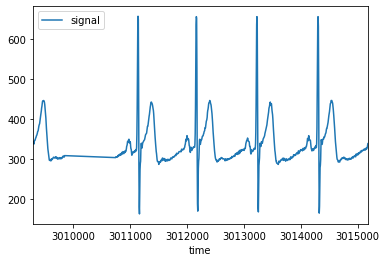

In [3]:
data.head(1000).plot("time","signal")

Persisiting noise from interference may be filtered out fairly effciently with an rolling average approach. Not used for now.

In [ ]:
#data['avg'] = data['signal'].rolling(5,center=True).mean()

Peak detecting on signal

In [4]:
idx = pu.indexes(np.array(data['signal'].fillna(0)), thres=0.8, min_dist=50)
len(idx)

614

Plotting

[3080185, 3085185, 0, 700]

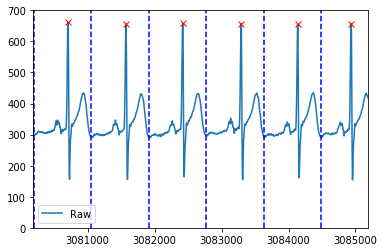

In [5]:
mp.plot(data['time'],data['signal'],label='Raw')
mp.plot(data['time'].iloc[idx],data['signal'].iloc[idx],'rx')
mp.plot([data['time'].iloc[idx[:-2]+70],data['time'].iloc[idx[:-2]+70]],[0,700],'b--')
mp.legend()
mp.axis([data['time'].iloc[14000],data['time'].iloc[15000],0,700])
#mp.axis([160000,170000,0,700])

Splitting according to determined peak

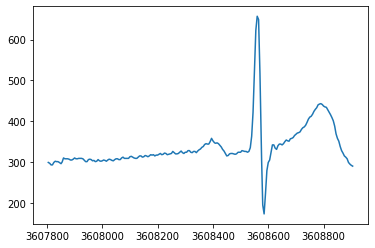

In [6]:
matplotlib.use('Agg')
for i in range(0,len(idx)-2):
    #clear_output()
    #print(str(i)+' of '+str(len(idx)))
    mp.clf()
    sample = data.iloc[idx[i]+70:idx[i+1]+70]
    outname = fname[0:16]+'{0:04d}'.format(i)+'.csv'
    sample.to_csv('../03_samples/'+outname,header=False,index=False)
    mp.plot(sample["time"],sample["signal"])
    mp.savefig('../03_samples/'+outname[:-3]+'png')